In [64]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1.k-最近傍法

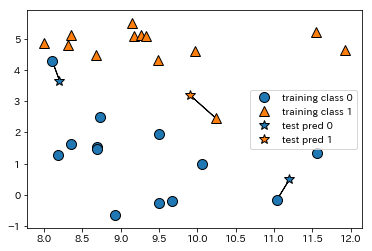

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

ここでは3つのデータを与え、それぞれに対して訓練データのうち最も近いものに印がつけられている。テストデータの色が分類されたクラスだ。  

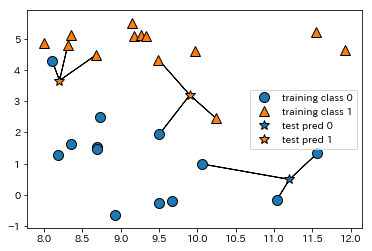

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

ここでは最近傍に3つの訓練データを指定した例。最も多数派のクラスに分類される。(左上のクラスのラベルが変わっている)

In [14]:
#sklearnでこのアルゴリズムがどうなるのか検証
from sklearn.model_selection import train_test_split

#データの読み込みと訓練データとテストデータの分割
X, y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)
print('Test set predictions: {}'.format(clf.predict(X_test)))
print('Test set acuurancy: {:,.2f}'.format(clf.score(X_test,y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set acuurancy: 0.86


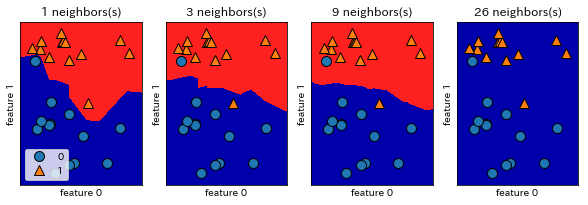

In [37]:
fig,axes = plt.subplots(1,4,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9,26],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

axes[0].legend(loc=3)

最近傍＝1の場合は決定境界は訓練データに近くなる。逆に最近傍を増やすと決定境界はなめらかなる。なめらかな決定境界はより単純なモデルに対応する。 つまり最近傍が少ない場合はより複雑なモデルに対応し、多い場合は複雑度が低いモデルに対応する

極端な例が最近傍の数が訓練データの数すべてにした場合。この場合どんなデータでも**全く同じ近傍点(つまりすべての訓練データのポイント)を持つので多数派として単純にデータ内で最も多いクラスで分類される**

## 汎化性能の評価
乳がんデータを用いて、最近傍の設定による精度の変化を評価する

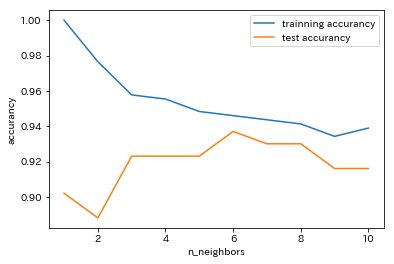

In [51]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
#stratifｙは層化抽出を使う。訓練データとテストデータで属性の比率が同程度になるようにする。
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_acuurancy = []
test_accurancy = []
n_neighbors_setteings = range(1,11) #最近傍の設定は1から10まで

for n_neighbors in n_neighbors_setteings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_acuurancy.append(clf.score(X_train,y_train))
    test_accurancy.append(clf.score(X_test,y_test))
    

plt.plot(n_neighbors_setteings,training_acuurancy,label='trainning accurancy')
plt.plot(n_neighbors_setteings,test_accurancy,label='test accurancy')
plt.ylabel('accurancy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

最近傍が1だと訓練データに過剰に適合して、テストデータの精度が低い。  
逆に最近傍数を増やすと、モデルはシンプルになりすぎて、訓練データにもテストデータにも適合が低い。  
最良の性能はだいたい最近傍の数が6くらいである。

## k-近傍回帰
k-最近傍法には回帰も行うことができる

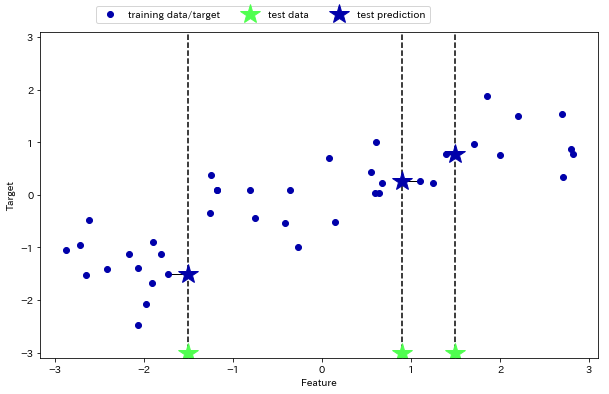

In [52]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

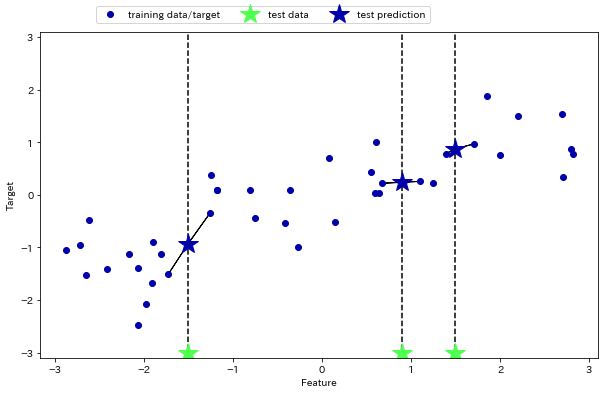

In [53]:
mglearn.plots.plot_knn_regression(n_neighbors=2)

In [82]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train,y_train)

print('Test set predictions:n\{}'.format(reg.predict(X_test)))

#回帰モデルにおけるScoreはR^2値(決定係数)を返す
print('Test set R^2:{:,.2f}'.format(reg.score(X_test,y_test)))

Test set predictions:n\[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2:0.83


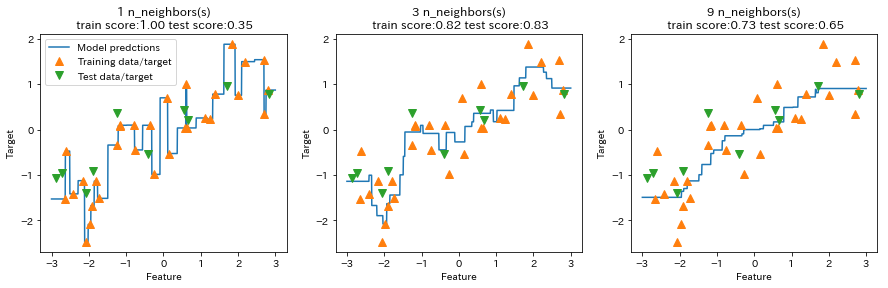

In [83]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

#-3から3まで1000個のデータポイントを作る(reshapeで1000の縦ベクトルに変換)
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', markersize=8) #多分ｃはcoloerのオプション
    ax.plot(X_test, y_test, 'v', markersize=8)
    train_score = reg.score(X_train,y_train)
    test_socre = reg.score(X_test,y_test)
    
    ax.set_title("{} n_neighbors(s)\n train score:{:,.2f} test score:{:,.2f}".format(n_neighbors,train_score,test_socre))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    
axes[0].legend(['Model predctions','Training data/target','Test data/target'],loc='best')

最近傍が一つだと訓練データをすべて通るため、明らかに過学習である。  
逆に最近傍数が増えると訓練データに対しても、テストデータに対しても精度が下がる。

## まとめ
- パラメータ調整  
実用上最近傍は3つか5つくらいでよいが適切に調整する必要がある。またデータとの距離の定義はユークリッド距離を使うのが一般的でありだいたいこれでうまくいく。  
- メリット  
モデルを理解しやすい。  
単純に全データとのユークリッド距離を算出してk内で最も多数派なクラスを割り当てる
より高度な技術を利用するまえはベースラインとして試してみるのもいい
- デメリット  
特徴量が多すぎる(数百)場合(次元の呪い、外れ値の影響)     
データ数が多すぎる場合は性能が悪い(すべての距離を算出する)

******
参考  
https://dev.classmethod.jp/machine-learning/2017ad_20171218_knn/  
https://qiita.com/NoriakiOshita/items/698056cb74819624461f